# Neural Net Reguression

# Data1:"2019-05-01"~"2019-06-06"<br>Data2:"2020-05-01"~"2020-06-06"<br><br>lr=0.01<br>Dropout=0.3<br>Cross Validation K-Fold

In [1]:
import warnings
warnings.simplefilter("ignore")

# change cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ML module
import sklearn
from sklearn.model_selection import train_test_split ## splite data into train data and validation data
from sklearn.preprocessing import StandardScaler     
from sklearn.metrics import r2_score                 
from sklearn.metrics import mean_squared_error

In [4]:
PROJECT_PATH = os.getcwd()  ## current directory

In [5]:
# read preprocessed pickle data  
df_1min_preprocessed = pd.read_pickle(PROJECT_PATH + "\\Data\\df_1min_preprocessed_01.pkl")

In [6]:
target_col = "FC_4125.PV"

In [7]:
# pick up important tag
list_ToPick_1_2 = [
#     "TI_4132.PV", #C-4102(H2S Stripper)塔頂温度
#     "FI_4119.PV", #C-4102(H2S Stripper)Reflux流量
#     "TI_4131.PV", #C-4102(H2S Stripper)Feed温度
    "LC_4119.PV", #C-4102(H2S Stripper)Level
    "TI_4133.PV", #C-4102(H2S Stripper)BTM温度
#     "FC_4136.PV", #C-4102(H2S Stripper)Stripping steam
#     "FI_4120.PV", #D-4110(H2S Stripper OH Receiver)ガス流量
#     "TI_4134.PV", #D-4110(H2S Stripper OH Receiver)液温度
#     "TI_4190.PV", #C-4103(Fractionator)BTM液E-4108出口温度
    "PC_4111.PV", #D-4110(H2S Stripper OH Receiver)圧力
#     "PC_4111.OP", #D-4110(H2S Stripper OH Receiver)圧力調節弁開度
    "TI_4135.PV", #F-4102(Fractionator feed furnace)入口温度
#     "TI_4165.PV", #F-4102(Fractionator feed furnace)ダクト温度
#     "TI_4140.PV", #F-4102(Fractionator feed furnace)出口温度
    "TC_4120.PV", #F-4102(Fractionator feed furnace)出口温度
    "FI_4149.PV", #F-4102(Fractionator feed furnace)燃料ガス入口流量
    "FI_4145.PV", #F-4102(Fractionator feed furnace)燃料油入口流量
    "FC_4121.PV", #F-4102(Fractionator feed furnace)入口各tube流量
#     "FC_4122.PV", #F-4102(Fractionator feed furnace)入口各tube流量
#     "FC_4123.PV", #F-4102(Fractionator feed furnace)入口各tube流量
#     "FC_4124.PV", #F-4102(Fractionator feed furnace)入口各tube流量
    "TC_4121.PV", #C-4103(Fractionator)塔頂温度
#     "TI_4141.PV", #C-4103(Fractionator)塔頂温度
#     "TI_4142.PV", #C-4103(Fractionator)Tray9抜出温度
#     "TI_4180.PV", #C-4103(Fractionator)Tray9温度
#     "TI_4143.PV", #C-4103(Fractionator)Feed zone温度
#     "TI_4146.PV", #C-4103(Fractionator)Tray7抜出温度
    "FC_4138.PV", #C-4104(Fractionator Side Stripper)Stripping steam流量
    "TI_4148.PV", #C-4104(Fractionator Side Stripper)BTM温度
    "TI_4147.PV", #C-4103(Fractionator)Side reflux戻り温度
    "FC_4137.PV", #C-4103(Fractionator)Stripping steam流量
    "TI_4144.PV", #C-4103(Fractionator)BTM温度
    "PC_4112.PV", #C-4103(Fractionator)塔頂圧力
    "LC_4123.PV", #C-4104(Fractionator Side Stripper)Level
#     "FC_4125.PV", #C-4103(Fractionator)Cold Reflux流量
    "FC_4126.PV", #C-4103(Fractionator)Side reflux流量
    "LC_4122.PV", #C-4103(Fractionator)Level
#                                        "PC_4112.OP", #(Fractionator)塔頂圧力調節弁開度
#                                        "PC_4112.OP_MakeUpSide", #C-4103(Fractionator)塔頂圧力調節弁開度(make-up side)
#                                        "PC_4112.OP_FlareSide", #C-4103(Fractionator)塔頂圧力調節弁開度(flare side)
    "PI_4128.PV", #D-4111(Fractionator OH Drum)圧力
    "TI_4145.PV", #D-4111(Fractionator OH Drum)温度
#     "LC_4125.PV", #D-4111(Fractionator OH Drum)water level
    "LC_4122.OP", #C-4103
    "FI_4117.PV", #'M-4101Back wash oil
    "AI_41022.PV", #Sp.Gr
    "FSI4135.PV", #TLRES　R/D
#     "TI_4151.PV", #TLRES　R/D
#     "PCX4129.PV", #P-4102 リカバリータービンフレッシュオイル圧力
#     "PQ_62003.PV", #HS TLRES to FCC
#     "PQ_62004.PV", #LS TLRES to FCC
#     "FC_61001.PV", #TLRES to Vf-2
    "HC_4113.OP", #E-4108 Bypass
#     "TI_4191.PV", #E-4101 TLRESout
]

In [8]:
# df_1min_originalData_all.iloc[52272:,:]
df_2019_May = df_1min_preprocessed['2019-05-01 00:01:00':'2019-05-31 23:59:00']

In [9]:
# df_1min_originalData_all.iloc[52272:,:]
df_2019_June = df_1min_preprocessed['2019-06-01 00:00:00':'2019-06-06 07:12:00']

In [10]:
# df_1min_originalData_all.iloc[52272:,:]
df_2020_May = df_1min_preprocessed['2020-05-01 00:01:00':'2020-05-31 23:59:00']

In [11]:
# df_1min_originalData_all.iloc[52272:,:]
df_2020_June = df_1min_preprocessed['2020-06-01 00:00:00':'2020-06-06 07:12:00']

# Connect split data to train+validation data(2019.May and 2020.May) and trial data(2019.June and 2020.June)
## *the above choice of the train+validation data and trial data is one of example

In [12]:
# train and validation data
df_train = pd.concat([df_2019_May, df_2020_May], axis=0)

In [13]:
# trial data
df_trial = pd.concat([df_2019_June, df_2020_June], axis=0)

In [14]:
# train and validation data
df_y = df_train.loc[:,target_col] # Target
df_X = df_train[list_ToPick_1_2] # Feature

In [15]:
# trial data

df_y_trial = df_trial.loc[:,target_col] # target
df_X_trial = df_trial[list_ToPick_1_2] # Feature

# Standalize Data

In [16]:
# standalize train and validation data
sc_y_train = StandardScaler()
train_y_std = sc_y_train.fit_transform(df_y.values.reshape(-1,1))
sc_X_train = StandardScaler()
train_X_std = sc_X_train.fit_transform(df_X.values)

In [17]:
# standalize traial data
trial_X_std_2019_ = sc_X_train.transform(df_X_trial['2019'].values)
trial_X_std_2020_ = sc_X_train.transform(df_X_trial['2020'].values)

In [18]:
# standalize trial data
trial_y_std_2019_ = sc_y_train.transform(df_y_trial['2019'].values.reshape(1, -1))
trial_y_std_2020_ = sc_y_train.transform(df_y_trial['2020'].values.reshape(1, -1))

# Execute Neural Net Learning

In [19]:
import random as rn

#　Neural Net Module
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential      ## Set NN model
from keras.layers import Dense, Dropout  ## Set Dense
from keras.optimizers import adam        ## Set Optimization
from keras import regularizers           ## Set Regularizer

Using TensorFlow backend.


In [20]:
# fix randomness
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
rn.seed(0)

session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

###　Keras,tensorflow　###
tf.set_random_seed(0)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)
###　Keras,tensorflow　###

In [21]:
###　Keras　###
# construct NN
def build_model():
    model = Sequential() ## Set NN model
    model.add(Dense(units=300, activation='relu', input_shape=(25,), kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer. input = Feature number
    model.add(Dropout(0.3)) ## Set dropout
    model.add(Dense(units=150, activation='relu', kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer
    model.add(Dropout(0.3)) ## Set dropout
    model.add(Dense(units=75, activation='relu', kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer
    model.add(Dropout(0.3)) ## Set dropout
    model.add(Dense(units=1)) ## units = Target number
    model.compile(optimizer='adam', loss='mean_squared_error') ## set laerning process
    return model
###　Keras　###

# Cross Validation K-fold

In [22]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

In [23]:
def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=True,\
                      early_stopping = EarlyStopping(monitor='val_loss', min_delta=-0.0001, patience=3, verbose=0, mode='auto')):
    
    kf = KFold(n_splits=n_splits, shuffle=kf_shuffle)

    models, train_scores, validation_scores= [],[],[]

    for train_index, val_index in kf.split(train_X,train_y):
        
        train_data=train_X[train_index]
        train_label=train_y[train_index]
        val_data=train_X[val_index]
        val_label=train_y_std[val_index]

        model=build_model()
        history=model.fit(train_data,
                          train_label,
                          epochs=epoch,
                          batch_size=2048,
                          validation_data=(val_data,val_label),
                          callbacks=[early_stopping],
                          verbose = 1 ## not show learning log                         
                         )

        models.append(model)

        loss=history.history['loss']
        val_loss=history.history['val_loss']

        # visualize learning curve
        x = history.epoch
        plt.plot(x, loss, label="loss")
        plt.plot(x, val_loss, label="val_loss")
        plt.title("Learning Curve")
        plt.legend(loc='best')
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.grid()
        plt.show()

        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data      
        print('R^2 train_std: %.3f' % r2_score(y_true=train_label, \
                                               y_pred=pred_train_y_std, multioutput='raw_values'))


        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        print('R^2 val_std: %.3f' % r2_score(y_true=val_label, \
                                             y_pred=pred_val_y_std, multioutput='raw_values'))

        train_score = r2_score(y_true=train_label, y_pred=pred_train_y_std, multioutput='raw_values')
        train_scores.append(train_score)

        validation_score= r2_score(y_true=val_label, y_pred=pred_val_y_std, multioutput='raw_values') 
        validation_scores.append(validation_score)

    fig, ax1 = plt.subplots(figsize=(3, 3))
    x = list(range(len(models)))

    ax1.plot(x, train_scores,"-",label="train_scores", lw=1, marker='o', markersize=2, markeredgewidth=4) 
    ax1.plot(x, validation_scores,"-",label="validation_scores", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)

    ax1.set_title('train_score vs validation_score')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('score')
    ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
    ax1.grid() ## Grid

    plt.show()
    return models

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 66958 samples, validate on 22320 samples
Epoch 1/100
66958/66958 [==============================] - 2s 31us/step - loss: 3.2358 - val_loss: 2.3921
Epoch 2/100
66958/66958 [==============================] - 2s 27us/step - loss: 1.9360 - val_loss: 1.4143
Epoch 3/100
66958/66958 [==============================] - 2s 27us/step - loss: 1.1543 - val_loss: 0.8391
Epoch 4/100
66958/66958 [==============================] - 2s 27us/step - loss: 0.7014 - val_loss: 0.5124
Epoch 5/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.4451 - val_loss: 0.3281
Epoch 6/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.2989 - val_loss: 0.2215
Epoch 7/100
66958/66958 [==============================] - 2s 26us/step - loss:

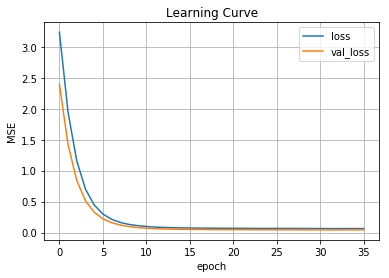

R^2 train_std: 0.979
R^2 val_std: 0.979
Train on 66958 samples, validate on 22320 samples
Epoch 1/100
66958/66958 [==============================] - 2s 31us/step - loss: 3.1967 - val_loss: 2.3382
Epoch 2/100
66958/66958 [==============================] - 2s 26us/step - loss: 1.8892 - val_loss: 1.3690
Epoch 3/100
66958/66958 [==============================] - 2s 26us/step - loss: 1.1210 - val_loss: 0.8102
Epoch 4/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.6825 - val_loss: 0.4974
Epoch 5/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.4376 - val_loss: 0.3224
Epoch 6/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.2978 - val_loss: 0.2210
Epoch 7/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.2167 - val_loss: 0.1617
Epoch 8/100
66958/66958 [==============================] - 2s 26us/step - loss: 0.1681 - val_loss: 0.1242
Epoch 9/100
66958/66958 [==============================] - 2s 

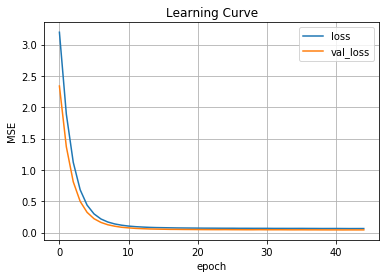

R^2 train_std: 0.979
R^2 val_std: 0.979
Train on 66959 samples, validate on 22319 samples
Epoch 1/100
66959/66959 [==============================] - 2s 32us/step - loss: 3.2514 - val_loss: 2.3989
Epoch 2/100
66959/66959 [==============================] - 2s 26us/step - loss: 1.9544 - val_loss: 1.4350
Epoch 3/100
66959/66959 [==============================] - 2s 26us/step - loss: 1.1817 - val_loss: 0.8646
Epoch 4/100
66959/66959 [==============================] - 2s 26us/step - loss: 0.7287 - val_loss: 0.5363
Epoch 5/100
66959/66959 [==============================] - 2s 27us/step - loss: 0.4690 - val_loss: 0.3487
Epoch 6/100
66959/66959 [==============================] - 2s 26us/step - loss: 0.3190 - val_loss: 0.2389
Epoch 7/100
66959/66959 [==============================] - 2s 26us/step - loss: 0.2307 - val_loss: 0.1728
Epoch 8/100
66959/66959 [==============================] - 2s 26us/step - loss: 0.1756 - val_loss: 0.1319
Epoch 9/100
66959/66959 [==============================] - 2s 

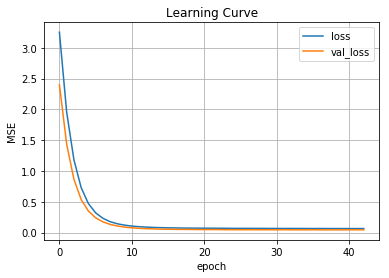

R^2 train_std: 0.979
R^2 val_std: 0.979
Train on 66959 samples, validate on 22319 samples
Epoch 1/100
66959/66959 [==============================] - 2s 33us/step - loss: 3.1994 - val_loss: 2.3207
Epoch 2/100
66959/66959 [==============================] - 2s 27us/step - loss: 1.8616 - val_loss: 1.3372
Epoch 3/100
66959/66959 [==============================] - 2s 26us/step - loss: 1.0847 - val_loss: 0.7753
Epoch 4/100
66959/66959 [==============================] - 2s 27us/step - loss: 0.6481 - val_loss: 0.4668
Epoch 5/100
66959/66959 [==============================] - 2s 27us/step - loss: 0.4084 - val_loss: 0.2967
Epoch 6/100
66959/66959 [==============================] - 2s 27us/step - loss: 0.2757 - val_loss: 0.2020
Epoch 7/100
66959/66959 [==============================] - 2s 27us/step - loss: 0.1998 - val_loss: 0.1457
Epoch 8/100
66959/66959 [==============================] - 2s 27us/step - loss: 0.1547 - val_loss: 0.1133
Epoch 9/100
66959/66959 [==============================] - 2s 

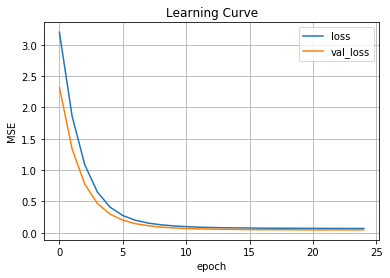

R^2 train_std: 0.976
R^2 val_std: 0.976


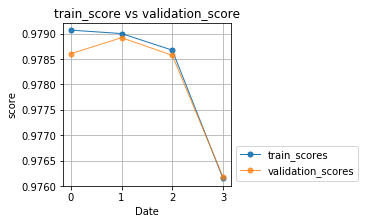

In [24]:
models = NN_cross_validate(train_X_std, train_y_std, 4, 100)

In [25]:
# output ensemble mean value from rach models developed by cross-validation
def def_pred_ensemble(model, df_trial):
    sum_predictedValue = 0
    for i in range(len(model)):
        sum_predictedValue = sum_predictedValue + model[i].predict(df_trial)

    pred_ensemble = sum_predictedValue/len(model)
    return pred_ensemble

In [26]:
pred_ensemble = def_pred_ensemble(models, trial_X_std_2019_)
pred_ensemble

array([[0.06183392],
       [0.07600097],
       [0.09092024],
       ...,
       [0.8951501 ],
       [0.89702445],
       [0.90509975]], dtype=float32)

In [38]:
def def_score_ensemble(model, df_trial_X, df_trial_y, target_unit): #(models, standarized_X, standarized_y)
    for i in range(len(models)):
        pred_train_y_std = models[i].predict(df_trial_X) ## predict target value by stadalized trial data
        print('R2 score_{}: %.3f'.format(i) % r2_score(y_true=df_trial_y,\
                                          y_pred=pred_train_y_std,\
                                          multioutput='raw_values'))        
        
        pred_train_y_inv = sc_y_train.inverse_transform(X=pred_train_y_std) ## inverse transform to before-standarized-pred_train_y
        true_train_y_inv = sc_y_train.inverse_transform(X=df_trial_y) ## inverse transform to before-standarized-pred_true_y       
        print('RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))   
    
    # get ensmble score
    pred_ensemble = def_pred_ensemble(model, df_trial_X)
    train_score = r2_score(y_true = df_trial_y, \
                           y_pred = pred_ensemble,\
                           multioutput='raw_values')
    print('ensemble score: %.3f' %train_score)
    
    pred_train_y_inv = sc_y_train.inverse_transform(X=pred_ensemble)
    print('ensemble RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))
    return 

In [39]:
print("R2 Score for Trial Dataset")
score_predictedEnsemble = def_score_ensemble(models,trial_X_std_2019_,trial_y_std_2019_.reshape(-1,1), "m3/h")

R2 Score for Trial Dataset
R2 score_0: 0.844
RMSE[m3/h]: 0.987
R2 score_1: 0.752
RMSE[m3/h]: 1.245
R2 score_2: 0.830
RMSE[m3/h]: 1.032
R2 score_3: 0.885
RMSE[m3/h]: 0.846
ensemble score: 0.835
ensemble RMSE[m3/h]: 1.015


In [40]:
select_model_id = 3 # selecet model_id you want to use. put "-1" if you want to use ensmble model

def calc_pred(models,select_model_id,df_x): # switch procedure depends on 1model or ensmble model
    if (select_model_id<0):
        pred_ = def_pred_ensemble(models,df_x)
    else:
        pred_ = models[select_model_id].predict(df_x)
    return pred_

# Predict target value with trial data(2019June&2020June) 

In [41]:
x_2019 = df_trial["2019"].index

In [42]:
pred_trial_y_std_ = calc_pred(models, select_model_id, trial_X_std_2019_) ## predict target value by stadalized trial data
pred_trial_y_inv_2019 = sc_y_train.inverse_transform(X=pred_trial_y_std_) ## inverse transform to before-standarized-pred_train_y

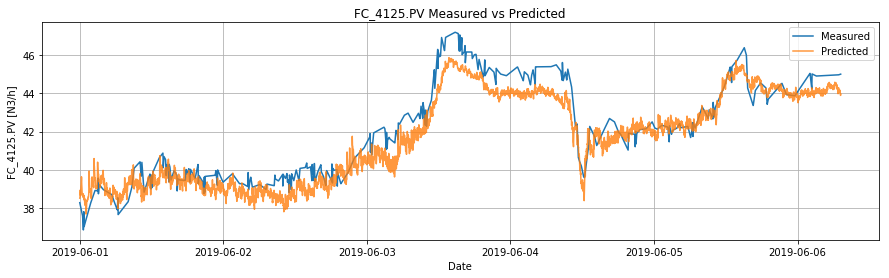

trial_score: 0.8853117256537673
trial_RMSE: 0.846


In [43]:
# plot measured value and predicted value
fig = plt.figure(figsize=(15, 4)) 
plt.plot(x_2019,df_y_trial['2019'].values.reshape(-1,1),"-",label="Measured")
plt.plot(x_2019,pred_trial_y_inv_2019,"-",label="Predicted", alpha=0.8)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Date')
plt.ylabel(target_col+" "+"[N3/h]")
plt.legend(loc='best')
plt.grid()

plt.show()
print("trial_score:", r2_score(y_true=df_y_trial['2019'].values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv_2019))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial['2019'].values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv_2019)))

# 2020年

In [44]:
x_2020 = df_trial["2020"].index

In [45]:
pred_trial_y_std_ = calc_pred(models,select_model_id,trial_X_std_2020_) 
pred_trial_y_inv_2020 = sc_y_train.inverse_transform(X=pred_trial_y_std_)

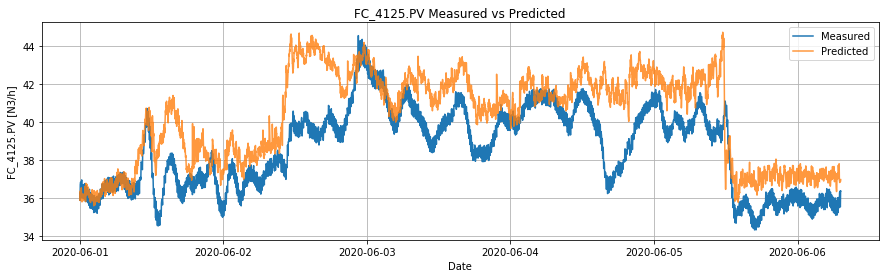

trial_score: 0.11906246545500065
trial_RMSE: 2.014


In [46]:
# plot measured value and predicted value
fig = plt.figure(figsize=(15, 4))
plt.plot(x_2020,df_y_trial['2020'].values.reshape(-1,1),"-",label="Measured")
plt.plot(x_2020,pred_trial_y_inv_2020,"-",label="Predicted", alpha=0.8)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Date')
plt.ylabel(target_col+" "+"[N3/h]")
plt.legend(loc='best')
plt.grid()

plt.show()
print("trial_score:", r2_score(y_true=df_y_trial['2020'].values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv_2020))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial['2020'].values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv_2020)))

# Save the model

In [49]:
model = models[select_model_id]
model.save('keras_nn_model_fsi4135.h5')

In [1]:
l1="[1]: Test"
l2=[1,2,3,4]
pick=[l1,l2]
pick

['[1]: Test', [1, 2, 3, 4]]

In [50]:
contents = '[1]: models'
pickle_models = [contents,
                 models
                ]

In [51]:
with open('models.pkl', mode='wb') as f:
    pickle.dump(pickle_models, f)

In [52]:
# call  keras model
# from keras.models import load_model
# model = load_model('keras_nn_model_fsi4135.h5')

In [56]:
# models load
with open('models.pkl', mode='rb') as f:
    pickle_in = pickle.load(f)
models = pickle_in[1]
ensmble_pred = calc_pred(models,-1,trial_X_std_2019_)